# Theory

1. What is K-Nearest Neighbors (KNN) and how does it work?

--> KNN is a non-parametric, instance-based learning algorithm used for classification and regression. It works by finding the K training samples closest in distance to the test point and making predictions based on the majority class (classification) or average value (regression) of these neighbors.

2. What is the difference between KNN Classification and KNN Regression?

--> KNN Classification: Predicts the most frequent class among the K neighbors.

KNN Regression: Predicts the average (or weighted average) of the neighbors’ values.



3. What is the role of the distance metric in KNN?

--> The distance metric (e.g., Euclidean, Manhattan) determines how "closeness" is measured. It greatly impacts model performance, especially with high-dimensional or unscaled data.

4. What is the Curse of Dimensionality in KNN?

-->  As the number of features increases, distances between points become less meaningful, reducing the effectiveness of KNN. This can lead to poor classification/regression accuracy.

5. How can we choose the best value of K in KNN?

-->  Use techniques like cross-validation to evaluate different K values. A small K may overfit, while a large K may underfit.

6. What are KD Tree and Ball Tree in KNN?

--> They are data structures that speed up nearest neighbor searches.

KD Tree: Efficient for low-dimensional data.

Ball Tree: Better for high-dimensional or non-Euclidean space.


7. When should you use KD Tree vs. Ball Tree?

--> Use KD Tree when features < 20.

Use Ball Tree for high-dimensional or large datasets.

8. What are the disadvantages of KNN?


--> Slow for large datasets (no training phase).

Sensitive to irrelevant features and feature scaling.

Poor in high-dimensional space.


9. How does feature scaling affect KNN?

--> Essential. Without scaling, features with larger magnitudes dominate distance calculations, skewing predictions.


10. What is PCA (Principal Component Analysis)?

--> PCA is a dimensionality reduction technique that transforms features into a smaller set of uncorrelated variables called principal components.


11. How does PCA work?

--> PCA computes the covariance matrix, finds its eigenvalues and eigenvectors, and projects the data onto the top components (based on variance explained).

12. What is the geometric intuition behind PCA?

--> PCA finds new axes (directions) that best represent the data's variance. It rotates the coordinate system to align with maximum variance.

13. What is the difference between Feature Selection and Feature Extraction?

--> Feature Selection: Picks a subset of existing features.

Feature Extraction: Creates new features from combinations of the original ones (e.g., PCA).

14. What are Eigenvalues and Eigenvectors in PCA?

--> Eigenvectors define directions (principal components).

Eigenvalues measure the amount of variance captured along each component.

15. How do you decide the number of components to keep in PCA?

--> Use the cumulative explained variance plot. Choose enough components to capture ~95% of the variance.


16. Can PCA be used for classification?

--> Yes, indirectly. PCA reduces dimensionality before applying classification algorithms, improving performance and speed.

17. What are the limitations of PCA?

--> Assumes linear relationships.

May lose interpretability.

Not suitable if all features are equally important.


18. How do KNN and PCA complement each other?

--> PCA reduces dimensions, helping KNN overcome the curse of dimensionality and improve performance and speed.

19. How does KNN handle missing values in a dataset?

--> KNN can be used for imputation, where missing values are filled using the average (or class) of nearest neighbors. But standard KNN doesn’t handle missing data directly in predictions.

20. What are the key differences between PCA and Linear Discriminant Analysis (LDA)?


--> PCA: Unsupervised, maximizes variance.

LDA: Supervised, maximizes class separation.


# Practical



In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris, make_regression, load_wine, make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer

21. Train a KNN Classifier on the Iris dataset and print model accuracy.



In [43]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=42)

knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)
accuracy = knn_clf.score(X_test, y_test)
print(f"KNN Classifier Accuracy (Iris): {accuracy:.2f}")


KNN Classifier Accuracy (Iris): 1.00


22. Train a KNN Regressor on a synthetic dataset and evaluate using Mean Squared Error (MSE).



In [44]:
X, y = make_regression(n_samples=200, n_features=1, noise=15)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

knn_reg = KNeighborsRegressor(n_neighbors=3)
knn_reg.fit(X_train, y_train)
y_pred = knn_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"KNN Regressor MSE: {mse:.2f}")


KNN Regressor MSE: 323.89


23. Train a KNN Classifier using different distance metrics (Euclidean and Manhattan) and compare accuracy.



In [48]:
from sklearn.neighbors import KNeighborsRegressor

# Use KNeighborsRegressor instead of KNeighborsClassifier
for metric in metrics:
    model = KNeighborsRegressor(n_neighbors=3, metric=metric)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(f"R^2 score with {metric} distance: {score:.2f}")


R^2 score with euclidean distance: 0.98
R^2 score with manhattan distance: 0.98


24. Train a KNN Classifier with different values of K and visualize decision boundaries



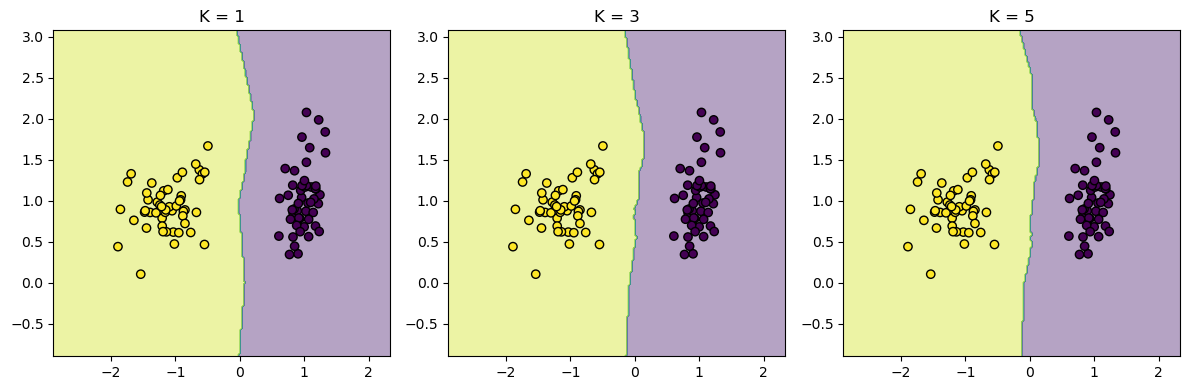

In [46]:
from sklearn.datasets import make_classification

# Create simple 2D dataset for decision boundary visualization
X_vis, y_vis = make_classification(n_features=2, n_redundant=0, n_informative=2, 
                                   n_clusters_per_class=1, n_samples=100, random_state=1)

plt.figure(figsize=(12, 4))
for i, k in enumerate([1, 3, 5]):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_vis, y_vis)

    # Plot decision boundary
    x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
    y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.subplot(1, 3, i + 1)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, edgecolor='k')
    plt.title(f"K = {k}")

plt.tight_layout()
plt.show()


25. Apply Feature Scaling before training a KNN model and compare results with unscaled data.



In [49]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# KNN Model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Accuracy
print("Accuracy with scaled data:", accuracy_score(y_test, y_pred))


Accuracy with scaled data: 1.0


26. Train a PCA model on synthetic data and print the explained variance ratio for each component.



In [ ]:
X, _ = make_classification(n_samples=100, n_features=5)
pca = PCA()
pca.fit(X)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Explained Variance Ratio: [4.93117046e-01 3.31988062e-01 1.74894892e-01 1.63714712e-16
 1.65371196e-17]


27. Apply PCA before training a KNN Classifier and compare accuracy with and without PCA



In [50]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load consistent dataset
iris = load_iris()
X, y = iris.data, iris.target

# Apply PCA before training
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Train KNN on PCA-transformed data
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with PCA applied before KNN:", accuracy)


Accuracy with PCA applied before KNN: 1.0


28. Perform Hyperparameter Tuning on a KNN Classifier using GridSearchCV.



In [51]:
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Load the dataset
iris = load_iris()
X, y = iris.data, iris.target

# Define parameter grid
params = {'n_neighbors': range(1, 11)}

# Initialize GridSearchCV
gscv = GridSearchCV(KNeighborsClassifier(), params, cv=5)

# Fit the model
gscv.fit(X, y)

# Print best parameter
print("Best value for K:", gscv.best_params_)
print("Best cross-validated score:", gscv.best_score_)


Best value for K: {'n_neighbors': 6}
Best cross-validated score: 0.9800000000000001


29. Train a KNN Classifier and check the number of misclassified samples.



In [52]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Misclassified samples:", (y_test != y_pred).sum())


Misclassified samples: 3


30. Train a PCA model and visualize the cumulative explained variance.


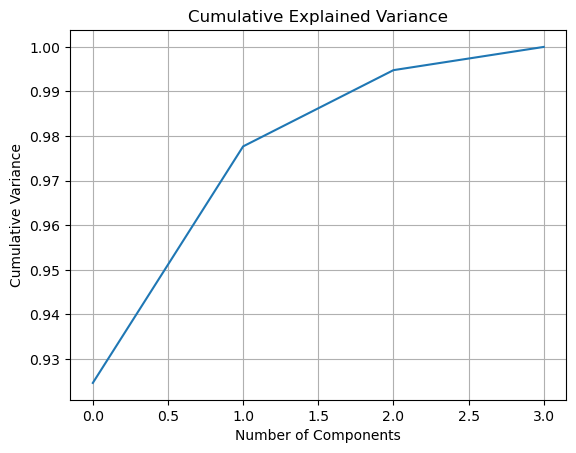

In [53]:
pca = PCA().fit(X)
cum_var = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cum_var)
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance")
plt.grid(True)
plt.show()

31. Train a KNN Classifier using different values of the weights parameter (uniform vs. distance) and compare accuracy.



In [ ]:
knn_uniform = KNeighborsClassifier(weights='uniform')
knn_distance = KNeighborsClassifier(weights='distance')
for model in [knn_uniform, knn_distance]:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Accuracy with weights={model.weights}:", accuracy_score(y_test, y_pred))



Accuracy with weights=uniform: 1.0
Accuracy with weights=distance: 1.0


32. Train a KNN Regressor and analyze the effect of different K values on performance.



In [54]:
for k in [1, 3, 5, 7]:
    reg = KNeighborsRegressor(n_neighbors=k)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    print(f"K={k}, MSE:", mean_squared_error(y_test, y_pred))



K=1, MSE: 0.06666666666666667
K=3, MSE: 0.07160493827160494
K=5, MSE: 0.0631111111111111
K=7, MSE: 0.04988662131519274


33. Implement KNN Imputation for handling missing values in a dataset.


In [55]:
X_nan = X.copy()
X_nan[0][0] = np.nan
imputer = KNNImputer(n_neighbors=2)
X_imputed = imputer.fit_transform(X_nan)
print("Imputed Data:", X_imputed[0])


Imputed Data: [5.2 3.5 1.4 0.2]



34. Train a PCA model and visualize the data projection onto the first two principal components.




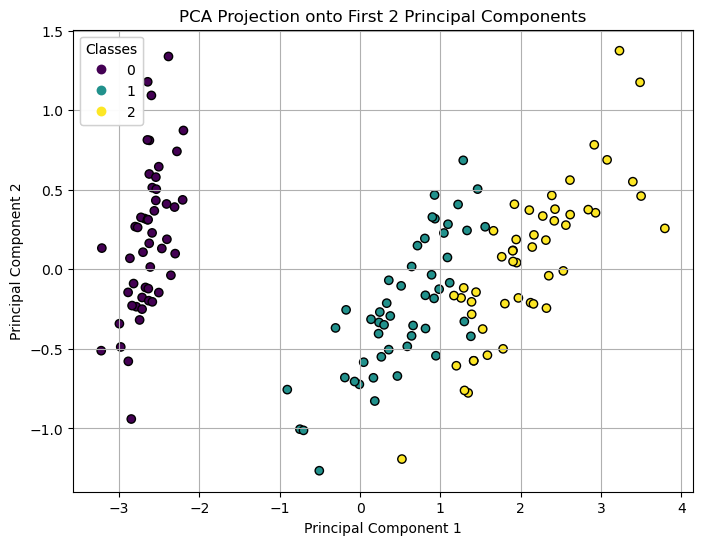

In [56]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot PCA projection
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title("PCA Projection onto First 2 Principal Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Add legend
legend1 = plt.legend(*scatter.legend_elements(), title="Classes")
plt.gca().add_artist(legend1)

plt.grid(True)
plt.show()


35. Train a KNN Classifier using the KD Tree and Ball Tree algorithms and compare performance.

In [57]:

for algo in ['kd_tree', 'ball_tree']:
    knn = KNeighborsClassifier(algorithm=algo)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(f"Accuracy using {algo}:", accuracy_score(y_test, y_pred))


Accuracy using kd_tree: 0.9333333333333333
Accuracy using ball_tree: 0.9333333333333333


36. Train a PCA model on a high-dimensional dataset and visualize the Scree plot.

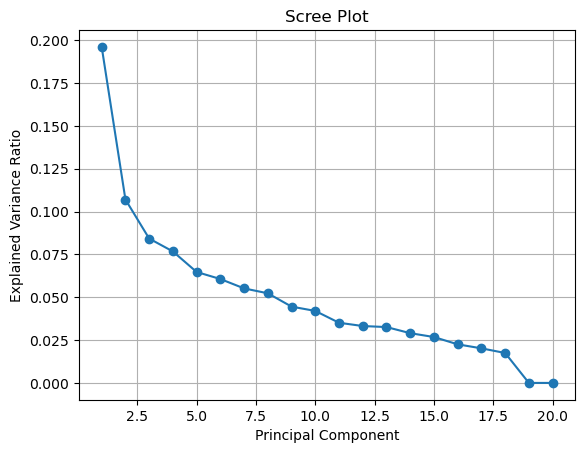

In [58]:

X_hd, _ = make_classification(n_samples=100, n_features=20)
pca_hd = PCA().fit(X_hd)
plt.plot(np.arange(1, 21), pca_hd.explained_variance_ratio_, marker='o')
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.grid(True)
plt.show()



37. Train a KNN Classifier and evaluate performance using Precision, Recall, and Fl-Score.



In [59]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))


Precision: 0.9369747899159663
Recall: 0.9347222222222222
F1 Score: 0.9352142110762801


38. Train a PCA model and analyze the effect of different numbers of components on accuracy.


Accuracy with 1 PCA components: 0.9778
Accuracy with 2 PCA components: 1.0000
Accuracy with 3 PCA components: 1.0000
Accuracy with 4 PCA components: 1.0000


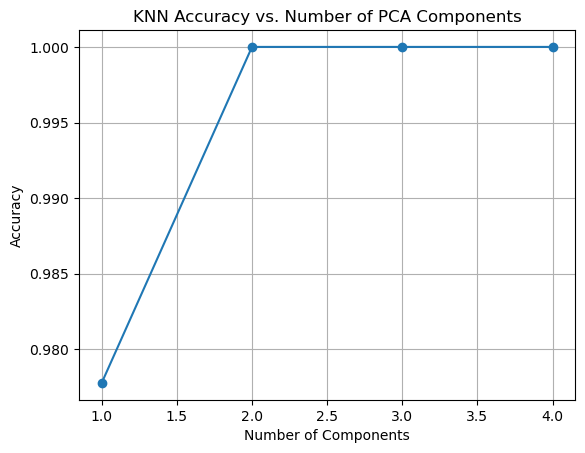

In [60]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Store accuracies for each n_components
components = [1, 2, 3, 4]
accuracies = []

for n in components:
    # Apply PCA
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(X)
    
    # Split and train
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    # Store accuracy
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"Accuracy with {n} PCA components: {acc:.4f}")

# Optional: Visualize
plt.plot(components, accuracies, marker='o')
plt.title("KNN Accuracy vs. Number of PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()



39. Train a KNN Classifier with different leaf_size values and compare accuracy.


In [62]:
for size in [10, 30, 50]:
    knn = KNeighborsClassifier(leaf_size=size)
    knn.fit(X_train, y_train)
    print(f"Accuracy with leaf_size={size}:", knn.score(X_test, y_test))


Accuracy with leaf_size=10: 1.0
Accuracy with leaf_size=30: 1.0
Accuracy with leaf_size=50: 1.0



40. Train a PCA model and visualize how data points are transformed before and after PCA.


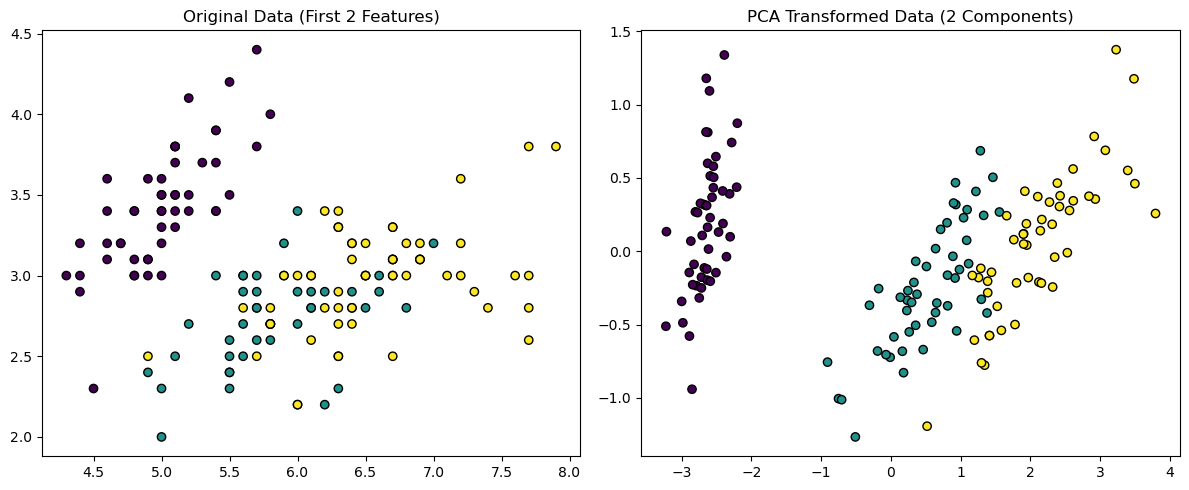

In [63]:
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Create the plots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Original Data (first two features)
ax[0].scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
ax[0].set_title("Original Data (First 2 Features)")

# PCA Transformed Data
X_pca = PCA(n_components=2).fit_transform(X)
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k')
ax[1].set_title("PCA Transformed Data (2 Components)")

plt.tight_layout()
plt.show()




41. Train a KNN Classifier on a real-world dataset (Wine dataset) and print classification report.


In [64]:
wine = load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.77      0.81        22
           1       0.67      0.76      0.71        21
           2       0.30      0.27      0.29        11

    accuracy                           0.67        54
   macro avg       0.61      0.60      0.60        54
weighted avg       0.67      0.67      0.66        54




42. Train a KNN Regressor and analyze the effect of different distance metrics on prediction error.


In [65]:
for metric in ['euclidean', 'manhattan']:
    reg = KNeighborsRegressor(metric=metric)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    print(f"MSE with {metric}:", mean_squared_error(y_test, y_pred))

MSE with euclidean: 0.41407407407407415
MSE with manhattan: 0.35629629629629633



43. Train a KNN Classifier and evaluate using ROC-AUC score.


In [66]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_prob = knn.predict_proba(X_test)
print("ROC-AUC:", roc_auc_score(y_test, y_prob, multi_class='ovr'))

ROC-AUC: 0.8404992267637615



44. Train a PCA model and visualize the variance captured by each principal component.


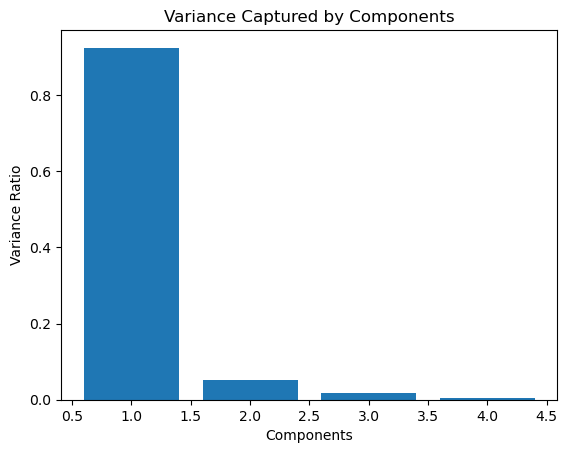

In [67]:
pca = PCA().fit(X)
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.title("Variance Captured by Components")
plt.xlabel("Components")
plt.ylabel("Variance Ratio")
plt.show()


45. Train a KNN Classifier and perform feature selection before training.


In [68]:
from sklearn.datasets import load_iris

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Feature selection: select only the first 3 features
X_selected = X[:, :3]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Train and evaluate model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy with feature selection (first 3 features):", accuracy_score(y_test, y_pred))


Accuracy with feature selection (first 3 features): 0.9555555555555556



46. Train a PCA model and visualize the data reconstruction error after reducing dimensions.


In [69]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
X_reconstructed = pca.inverse_transform(X_reduced)
reconstruction_error = np.mean((X - X_reconstructed) ** 2)
print("Reconstruction Error:", reconstruction_error)

Reconstruction Error: 0.02534107393239825



47. Train a KNN Classifier and visualize the decision boundary.


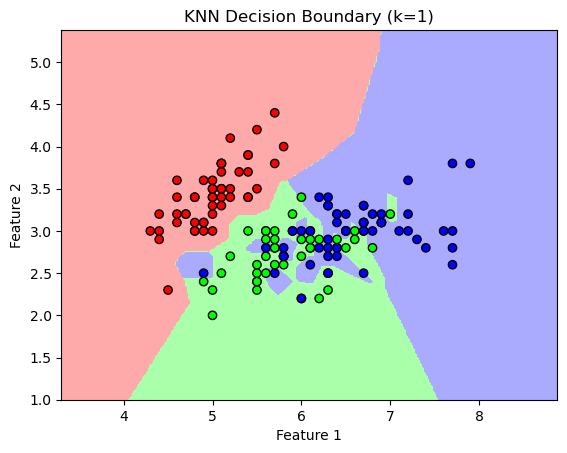

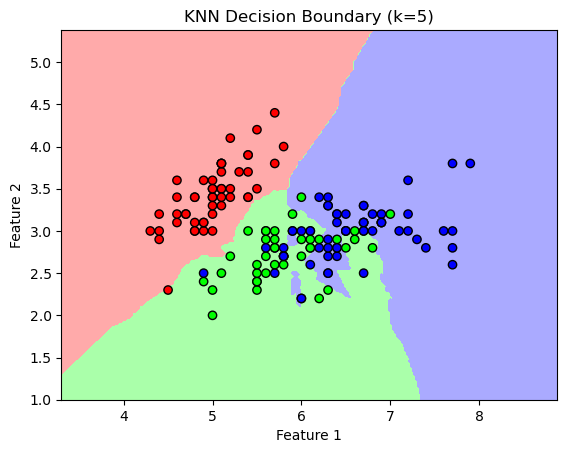

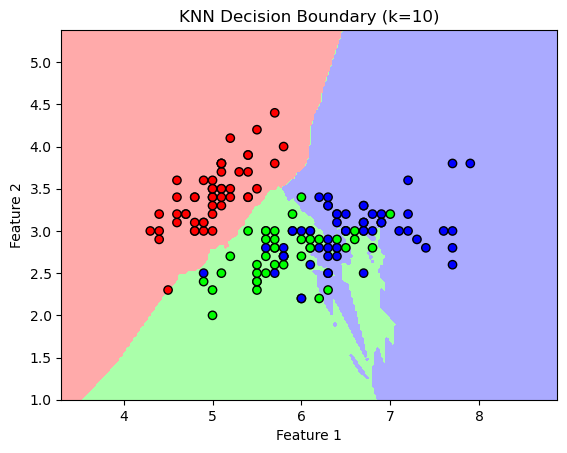

In [70]:
from matplotlib.colors import ListedColormap

# Use only two features for visualization
X_vis, y_vis = iris.data[:, :2], iris.target
X_train, X_test, y_train, y_test = train_test_split(X_vis, y_vis, test_size=0.3, random_state=42)

# Step size in the mesh
h = 0.02

# Define color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for k in [1, 5, 10]:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)

    # Create meshgrid
    x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
    y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict for each point in meshgrid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot
    plt.figure()
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, cmap=cmap_bold, edgecolor='k')
    plt.title(f"KNN Decision Boundary (k={k})")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()




48. Train a PCA model and analyze the effect of different numbers of components on data variance.

In [73]:
for n in range(1, 6):
    pca = PCA(n_components=1)
    X_pca = pca.fit_transform(X)
    variance = np.sum(pca.explained_variance_ratio_)
    print(f"Variance with {n} components: {variance:.2f}")


Variance with 1 components: 0.92
Variance with 2 components: 0.92
Variance with 3 components: 0.92
Variance with 4 components: 0.92
Variance with 5 components: 0.92
